<a href="https://colab.research.google.com/github/crisbbarbosa/crisbbarbosa/blob/main/BDS_ISglobal_Exposome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISGLOBAL SUMMER WORKSHOP 2022 #
##DATA SCIENCE HANDS-ON SESSION##

Prepared by Dr. Paula Petrone
Biomedical Data Science Team ISGLOBAL

paula.petrone@isglobal.org

### Objectives
1. Understand the structure of a Machine Learning Pipeline
2. Build an end-to-end ML pipeline on a real-world data
3. Train and compare several machine learning for prediction of outcomes


###Data sets:
- **BMI continuous** (body mass index)
- Raven continuous  (an outcome that measures IQ)
- Gen_tot (an outcome that measures externalizing behaviour)

Classification
- BMI categorical (normal vs overweight)


###To be addressed:
Can we predict high BMI given exposome variables?


# **Machine learning pipeline**

1. Understanding Problem Statement:

    *Can we predict the outcome based on explanatory variables? (regression/classification)*


2. Data Exploration and Preprocessing
 Useful resources:
   
    [Load data](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92#:~:text=2)
    
    [Examine datasset](https://note.nkmk.me/en/python-pandas-len-shape-size/)
  
     [Impute data](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.fillna.html)

     [Encode categorical variable](https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/)
     
    1. Load the data
    2. Impute the missing values
    3. Encode the categorical (string) variables
    4. Normalize/scale the data if required
    5. Descriptive modeling (Correlation analysis)
    6. Exploratory analysis (Unsupervised: PCA, Clustering)

    [PCR vs PLS](https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html)

    [PCA, PCR, PLS](https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#sphx-glr-auto-examples-cross-decomposition-plot-pcr-vs-pls-py)

    [PCA vs LDA](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

    [Scatterplot](https://realpython.com/visualizing-python-plt-scatter/)

    [How to cluster & visualize](https://www.askpython.com/python/examples/plot-k-means-clusters-python)


3. Model Building
  1. Define test and train split
  2. Normalization
  3. Train the model & compute train set performance
  4. Test de model on unseen data & compute train set performance

  [Linear Regression](https://becominghuman.ai/implementing-and-visualizing-linear-regression-in-python-with-scikit-learn-a073768dc688)

  [Logistic regression vs SVR](https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16)
   
  [Model evaluation](https://docs.w3cub.com/scikit_learn/auto_examples/classification/plot_classifier_comparison)


4. Explaining and reporting
  1. Model performance evaluation
  2. Explainability and feature importance

  [Feature importance](https://machinelearningmastery.com/calculate-feature-importance-with-python/)



# 1. Understanding Problem Statement

    Can we predict the outcome based on explanatory variables? (regression/classification)*

#2. Data Processing
Upload the data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving bmi.xlsx to bmi.xlsx


In [2]:
import pandas as pd

df = pd.read_excel('bmi.xlsx',index_col=None, sheet_name= "participant values")

## Load codebook as dictionary
df_code = pd.read_excel('bmi.xlsx', index_col='variable_name',sheet_name='codebook')
df_code = df_code[['description','domain','family']]
df_dict = df_code.to_dict('index')

#raven = pd.read_excel('raven.xlsx', index_col=None)
#gen_tot = pd.read_excel('gen_tot.xlsx', index_col=None)


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df

,hs_trafnear_h_pow1over3,hs_globalexp2_None,hs_cotinine_mcat_None,hs_participation_3cat_None,hs_mecpp_cadj_Log2,hs_mep_cadj_Log2,hs_pfna_c_Log2,hs_pfhxs_c_Log2,hs_pbde47_cadj_Log2,hs_pbde47_madj_Log2,...,hs_cu_c_Log2,h_legume_preg_Ter,h_bfdur_Ter,h_PM_Log,h_NO2_Log,h_accesslines300_preg_dic0,h_accesspoints300_preg_Log,hs_pm25abs_wk_hs_h_Log,h_abs_ratio_preg_Log,hs_zbmi_who
0,24.914911,exposure,Smokers,1 organisation,6.815175,4.168832,-2.483723,-2.733206,-8.972840,-1.404218,...,9.710806,"(2,Inf]","(0,10.8]",2.604548,4.576481,0,1.962937,0.071154,0.896711,0.30
1,27.905292,no exposure,Smokers,1 organisation,4.950059,6.025384,-0.972292,-3.483876,-2.424321,-0.231359,...,9.943980,"(2,Inf]","(0,10.8]",2.328879,3.368754,0,2.368356,0.214289,0.892538,0.41
2,29.299706,no exposure,Smokers,None,5.009923,3.861531,-0.106430,-2.248410,-2.506691,-1.833397,...,9.929258,"(2,Inf]","(34.9,Inf]",2.327120,4.297368,0,1.269931,0.719744,0.778723,3.33
3,22.743850,exposure,Non-smokers,None,4.338707,3.575644,-0.027508,1.202657,-3.446691,-0.438504,...,10.192293,"(2,Inf]","(10.8,34.9]",1.657071,2.504501,1,4.527757,-0.138692,0.089056,-0.76
4,14.131454,no exposure,Non-smokers,None,5.415837,8.199272,-2.606924,-1.203215,-1.268688,1.191427,...,9.436712,"(0.5,2]","(10.8,34.9]",3.616714,6.915149,1,3.061456,-0.138005,0.604781,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,0.000000,no exposure,SHS smokers,2 or more organisations,7.037296,3.077573,-0.708526,-2.835908,-0.580756,1.191427,...,10.049849,"(2,Inf]","(10.8,34.9]",2.304238,2.576976,0,1.269931,0.596653,-0.099819,1.94
1297,14.059610,no exposure,Non-smokers,None,5.034571,4.737302,-0.113794,-0.987264,-0.077749,1.191427,...,9.768184,"(0.5,2]","(10.8,34.9]",1.974531,4.161095,1,2.656014,0.596653,1.043402,-0.46
1298,19.439435,no exposure,Smokers,None,4.851337,3.523980,0.236325,-2.162491,-8.723587,-1.404218,...,9.774787,"(2,Inf]","(34.9,Inf]",2.643199,4.328962,0,1.962937,0.569140,0.864024,1.04
1299,19.492218,no exposure,Non-smokers,2 or more organisations,5.288298,3.394833,-0.661650,-0.982444,-2.654748,-2.778790,...,10.240791,"(0,0.5]","(0,10.8]",2.344657,3.457761,0,3.061456,0.478571,0.270579,-1.18


Verify that data has been acquired correctly

In [4]:
# Upload datasets


target = 'hs_zbmi_who'  #target variable to predict

##Information on the dataframe

nrow, ncol = df.shape
print('Number of observations, features:',nrow, ncol);
print ()

# Columns
print('List of variables:')
print(list (df.columns.values))


Number of observations, features: 1301 29

List of variables:
['hs_trafnear_h_pow1over3', 'hs_globalexp2_None', 'hs_cotinine_mcat_None', 'hs_participation_3cat_None', 'hs_mecpp_cadj_Log2', 'hs_mep_cadj_Log2', 'hs_pfna_c_Log2', 'hs_pfhxs_c_Log2', 'hs_pbde47_cadj_Log2', 'hs_pbde47_madj_Log2', 'hs_dep_cadj_Log2', 'hs_detp_madj_Log2', 'hs_hcb_cadj_Log2', 'hs_pcb180_cadj_Log2', 'h_lden_cat_preg_None', 'hs_ndvi100_h_None', 'h_ndvi100_preg_None', 'h_temperature_preg_None', 'hs_cd_m_Log2', 'hs_cu_c_Log2', 'h_legume_preg_Ter', 'h_bfdur_Ter', 'h_PM_Log', 'h_NO2_Log', 'h_accesslines300_preg_dic0', 'h_accesspoints300_preg_Log', 'hs_pm25abs_wk_hs_h_Log', 'h_abs_ratio_preg_Log', 'hs_zbmi_who']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hs_trafnear_h_pow1over3     1301 non-null   float64
 1   hs_globalexp2_None          1301 non-null   object 
 2   hs_cotinine_mcat_None       1301 non-null   object 
 3   hs_participation_3cat_None  1301 non-null   object 
 4   hs_mecpp_cadj_Log2          1301 non-null   float64
 5   hs_mep_cadj_Log2            1301 non-null   float64
 6   hs_pfna_c_Log2              1301 non-null   float64
 7   hs_pfhxs_c_Log2             1301 non-null   float64
 8   hs_pbde47_cadj_Log2         1301 non-null   float64
 9   hs_pbde47_madj_Log2         1301 non-null   float64
 10  hs_dep_cadj_Log2            1301 non-null   float64
 11  hs_detp_madj_Log2           1301 non-null   float64
 12  hs_hcb_cadj_Log2            1301 non-null   float64
 13  hs_pcb180_cadj_Log2         1301 

Check for Null Values

In [6]:
#Check for null values

df.isna()
df.isna().sum()

hs_trafnear_h_pow1over3       0
hs_globalexp2_None            0
hs_cotinine_mcat_None         0
hs_participation_3cat_None    0
hs_mecpp_cadj_Log2            0
hs_mep_cadj_Log2              0
hs_pfna_c_Log2                0
hs_pfhxs_c_Log2               0
hs_pbde47_cadj_Log2           0
hs_pbde47_madj_Log2           0
hs_dep_cadj_Log2              0
hs_detp_madj_Log2             0
hs_hcb_cadj_Log2              0
hs_pcb180_cadj_Log2           0
h_lden_cat_preg_None          0
hs_ndvi100_h_None             0
h_ndvi100_preg_None           0
h_temperature_preg_None       0
hs_cd_m_Log2                  0
hs_cu_c_Log2                  0
h_legume_preg_Ter             0
h_bfdur_Ter                   0
h_PM_Log                      0
h_NO2_Log                     0
h_accesslines300_preg_dic0    0
h_accesspoints300_preg_Log    0
hs_pm25abs_wk_hs_h_Log        0
h_abs_ratio_preg_Log          0
hs_zbmi_who                   0
dtype: int64

#Imputation of missing values

In this case, imputation is not necessary.

For imputation techniques check [SciKit learn Impute package](https://scikit-learn.org/stable/modules/impute.html)



#Codification of categorical variables

There are three types of Categorical Variables:

**Binary**:  Married? YES/NO. Employed? YES/NO
Encoded as 0, 1

**Ordinal**: Education? PRIMARY/SECONDARY/UNIVERSITY.  Physical Exercise? NO/SOMETIMES/ALWAYS
Encoded as 1,2,3

**Nominal**: Diagnosis? Cardiovascular Disease. Country of Origin: NIGERIA
Encoded: ONE-HOT Encoding

For categorical encoding see: [All ABout Categorical Variable Encoding](https://scikit-learn.org/stable/modules/impute.html)




In [7]:
import numpy as np
#EXCLUDE categorical variables

#find categorical variables
df = df.select_dtypes(exclude=[np.object])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hs_trafnear_h_pow1over3     1301 non-null   float64
 1   hs_mecpp_cadj_Log2          1301 non-null   float64
 2   hs_mep_cadj_Log2            1301 non-null   float64
 3   hs_pfna_c_Log2              1301 non-null   float64
 4   hs_pfhxs_c_Log2             1301 non-null   float64
 5   hs_pbde47_cadj_Log2         1301 non-null   float64
 6   hs_pbde47_madj_Log2         1301 non-null   float64
 7   hs_dep_cadj_Log2            1301 non-null   float64
 8   hs_detp_madj_Log2           1301 non-null   float64
 9   hs_hcb_cadj_Log2            1301 non-null   float64
 10  hs_pcb180_cadj_Log2         1301 non-null   float64
 11  h_lden_cat_preg_None        1301 non-null   float64
 12  hs_ndvi100_h_None           1301 non-null   float64
 13  h_ndvi100_preg_None         1301 

<ipython-input-7-cbf26ee63ab8>:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df = df.select_dtypes(exclude=[np.object])


Descriptive statistics to inspect data quality


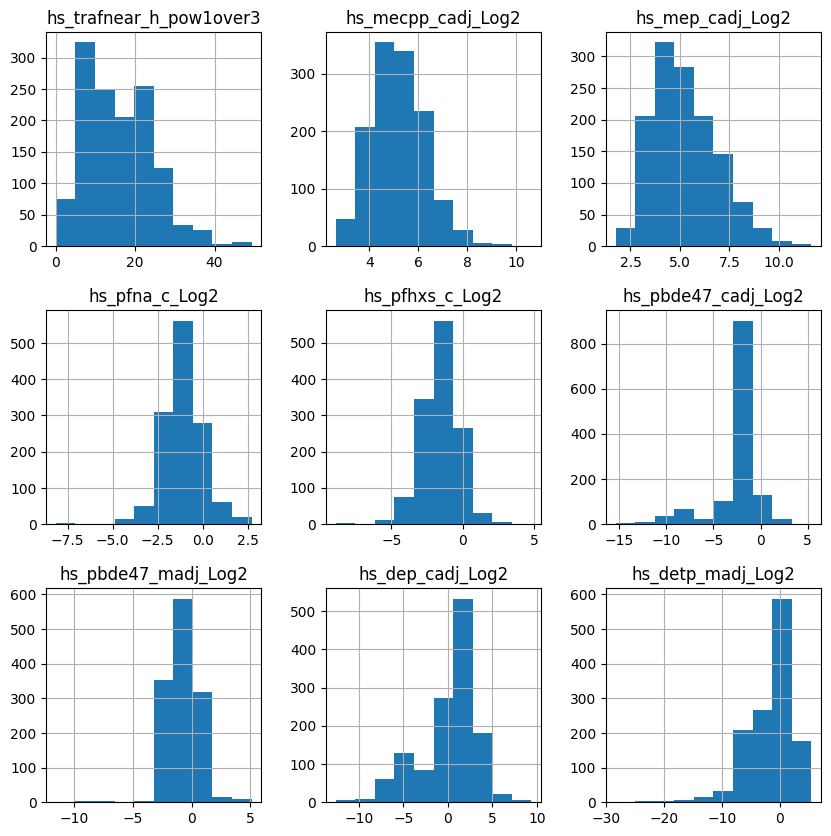

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df_reduced = df[list(df.columns)[0:9]] #only plotting a few columns

df_reduced.hist(figsize=[10,10]);

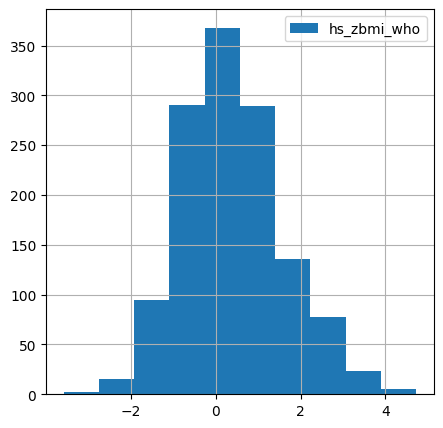

In [9]:
#Plot histogram of target

df[target].hist(figsize=[5,5], legend=True, xlabelsize=10)
plt.show()



Normalize continuous variables

In [10]:
#Scale the data  (only for descriptive analysis. ML rescale)
from sklearn.preprocessing import StandardScaler
import numpy as np

# create an object of the StandardScaler
scaler = StandardScaler()

# Create an array of features with all the data values

df_cols = list(df.columns.values)
features = df[df_cols]

# Use scaler of choice; here Standard scaler is used: Mean = 0, SD = 1
scaler = StandardScaler().fit(features.values)
features_scaled = scaler.transform(features.values)

# Create new normalized dataframe
df_scaled = pd.DataFrame(columns=df_cols)
df_scaled[df_cols] = features_scaled  #Puts together the matrix and the names of columns
#df_scaled.info()

Variance
hs_trafnear_h_pow1over3    1.000769
hs_mecpp_cadj_Log2         1.000769
hs_mep_cadj_Log2           1.000769
hs_pfna_c_Log2             1.000769
hs_pfhxs_c_Log2            1.000769
hs_pbde47_cadj_Log2        1.000769
hs_pbde47_madj_Log2        1.000769
hs_dep_cadj_Log2           1.000769
hs_detp_madj_Log2          1.000769
dtype: float64
Mean
hs_trafnear_h_pow1over3    4.096134e-17
hs_mecpp_cadj_Log2         4.396517e-16
hs_mep_cadj_Log2          -4.533055e-16
hs_pfna_c_Log2             2.457680e-17
hs_pfhxs_c_Log2            6.895159e-17
hs_pbde47_cadj_Log2        9.830722e-17
hs_pbde47_madj_Log2        2.457680e-17
hs_dep_cadj_Log2          -1.160571e-17
hs_detp_madj_Log2         -8.192268e-18
dtype: float64


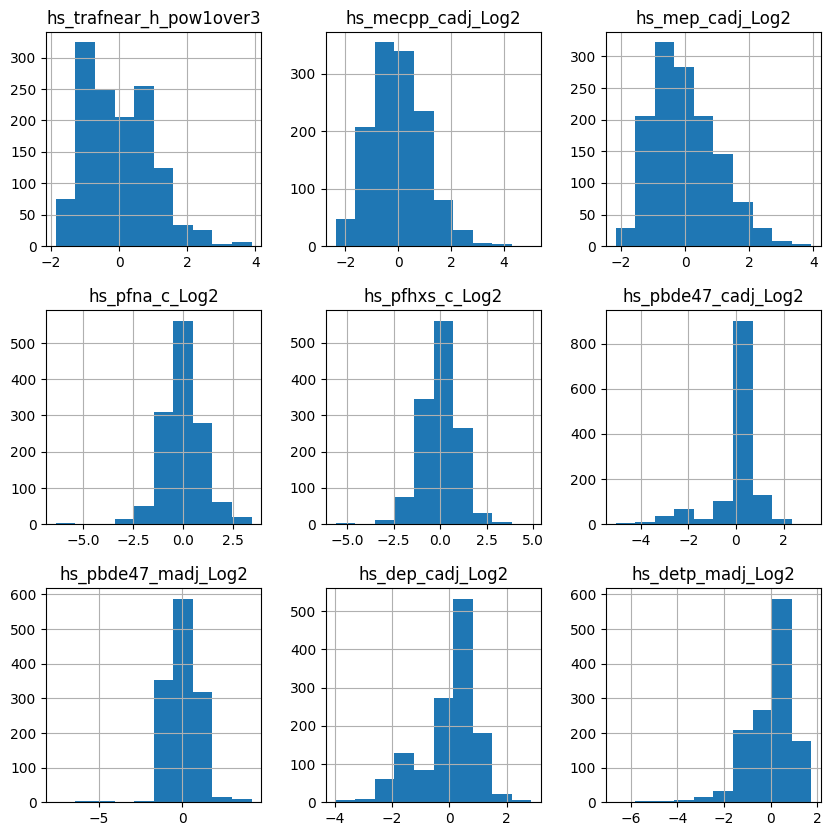

In [11]:
from matplotlib.pylab import plot
#Plot distributions

#Number of columns to plot
ncols = 9
df_scaled_reduced = df_scaled[list(df_scaled.columns)[0:ncols]] #subset of columns
a = df_scaled_reduced.hist(figsize=[10,10])

print('Variance')
print(df_scaled_reduced.var())

print('Mean')
print(df_scaled_reduced.mean())

# Descriptive modelling

Correlation matrix and hierarchical clustering visualization


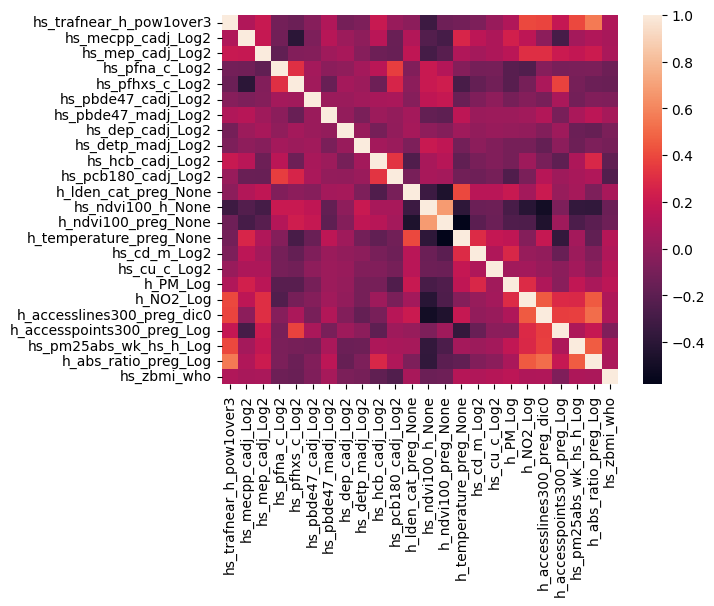

In [12]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df_scaled.corr()
sn.heatmap(corrMatrix, annot=False, yticklabels='auto')
plt.show()

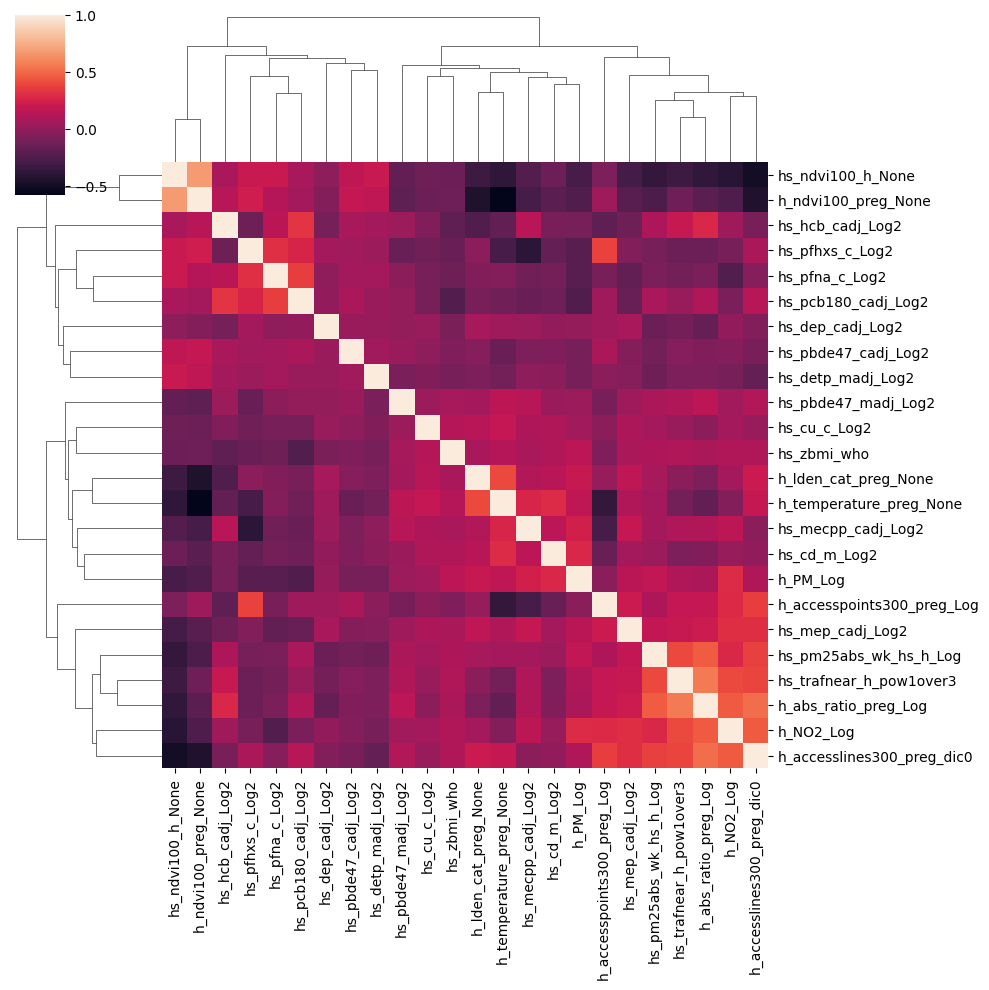

In [13]:
# Better visualization with hierachical maps
sn.clustermap(corrMatrix);

<ipython-input-14-d838e0596a10>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_upper = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(np.bool));


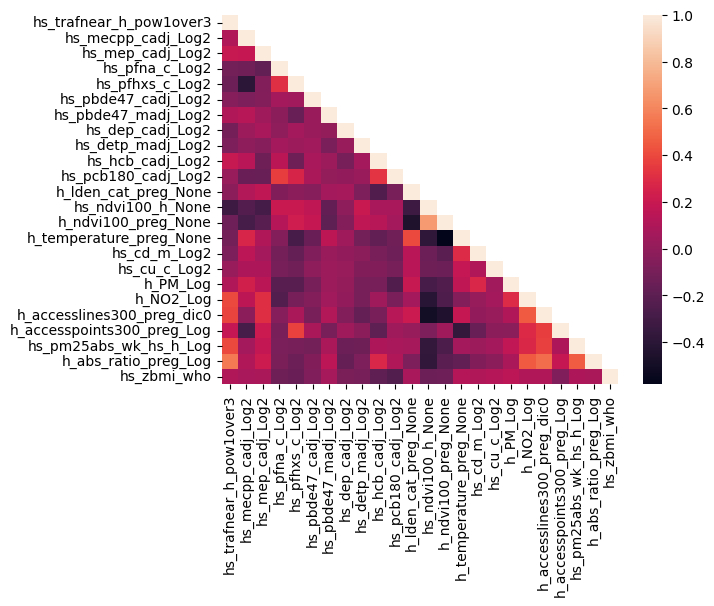

In [14]:
#Upper diagonal (The full matrix has redundant information)
corr_upper = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(np.bool));
hmap = sn.heatmap(corr_upper);
hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn.png",
                    format='png',
                    dpi=150);

In [15]:
#Find highly correlated pairs

#remove diagonal
np.fill_diagonal(corr_upper.values, 0)

#Find highest correlation pairs sorted
c = corr_upper.abs()
s = c.unstack()
corr_high = s.sort_values(kind="quicksort", ascending=False)[0:5]

print('Pairs of correlated variables ranked:')
print(corr_high)

Pairs of correlated variables ranked:
hs_ndvi100_h_None           h_ndvi100_preg_None           0.676123
h_ndvi100_preg_None         h_temperature_preg_None       0.580118
hs_trafnear_h_pow1over3     h_abs_ratio_preg_Log          0.561313
h_accesslines300_preg_dic0  h_abs_ratio_preg_Log          0.517363
hs_ndvi100_h_None           h_accesslines300_preg_dic0    0.505670
dtype: float64


In [16]:
#Find descriptions for variables in dictionary

#Unpack the correlation matrix
corr_high = corr_high.to_frame().reset_index()[['level_0','level_1']]

#Print correlated variables & descriptions
for r in corr_high.index:
  print(corr_high['level_0'][r], '   ', corr_high['level_1'][r])
  print(df_dict[corr_high['level_0'][r]], '   ', df_dict[corr_high['level_1'][r]])
  print()

hs_ndvi100_h_None     h_ndvi100_preg_None
{'description': 'Average of NDVI values within a buffer of 100mat home', 'domain': 'Outdoor exposures', 'family': 'Natural Spaces'}     {'description': 'Average of NDVI values within a buffer of 100mat pregnancy period', 'domain': 'Outdoor exposures', 'family': 'Natural Spaces'}

h_ndvi100_preg_None     h_temperature_preg_None
{'description': 'Average of NDVI values within a buffer of 100mat pregnancy period', 'domain': 'Outdoor exposures', 'family': 'Natural Spaces'}     {'description': 'Temperature average during pregnancy', 'domain': 'Outdoor exposures', 'family': 'Meteorological'}

hs_trafnear_h_pow1over3     h_abs_ratio_preg_Log
{'description': 'Traffic density on nearest road at home', 'domain': 'Outdoor exposures', 'family': 'Traffic'}     {'description': 'abs value (extrapolated back in time using ratio method)duringpregnancy', 'domain': 'Outdoor exposures', 'family': 'Air Pollution'}

h_accesslines300_preg_dic0     h_abs_ratio_preg_Log

**NDVI values**: Normalized Difference Vegetation Index (NDVI)
Very low values of NDVI (0.1 and below) correspond to barren areas of rock, sand, or snow. Moderate values represent shrub and grassland (0.2 to 0.3), while high values indicate temperate and tropical rainforests (0.6 to 0.8).

In [17]:
#Correlation between BMI and all variables (sorted)

#Find list of higher correlation
variable_corr = corrMatrix[target].sort_values(kind="quicksort", ascending=False)[0:6]
print('Variables correlated with BMI')
print(variable_corr)
print()

#Unpack correlation matrix
variable_corr = list(variable_corr.to_frame().reset_index()['index'])

#Print correlated variables & descriptions from dictionary
print('Variables correlated with BMI and descriptions')
for var in variable_corr:
   print (var, df_dict[var])
   print()



Variables correlated with BMI
hs_zbmi_who                1.000000
h_PM_Log                   0.150874
h_temperature_preg_None    0.127190
hs_cu_c_Log2               0.125789
hs_cd_m_Log2               0.111152
hs_trafnear_h_pow1over3    0.109318
Name: hs_zbmi_who, dtype: float64

Variables correlated with BMI and descriptions
hs_zbmi_who {'description': 'Body mass index z-score at 6-11 years old - WHO reference - Standardized on sex and age', 'domain': 'Phenotype', 'family': 'Phenotype'}

h_PM_Log {'description': 'Concentration of particulate matter', 'domain': 'Indoor air', 'family': 'Indoor air'}

h_temperature_preg_None {'description': 'Temperature average during pregnancy', 'domain': 'Outdoor exposures', 'family': 'Meteorological'}

hs_cu_c_Log2 {'description': 'Copper (Cu) in child', 'domain': 'Chemicals', 'family': 'Metals'}

hs_cd_m_Log2 {'description': 'Cadmium (Cd) in mother', 'domain': 'Chemicals', 'family': 'Metals'}

hs_trafnear_h_pow1over3 {'description': 'Traffic density 

#PCA analysis#

In [18]:
#Principal component analysis. Requires standardization (done in previous section)


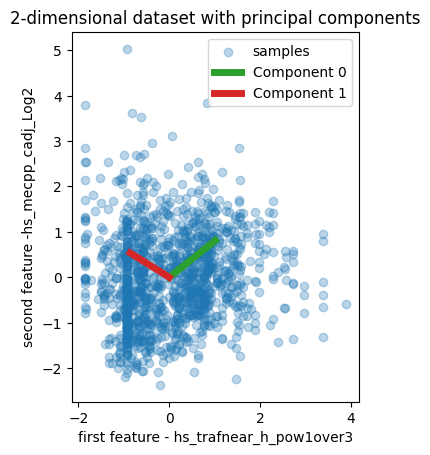

In [19]:
from sklearn.decomposition import PCA

#DataFrame to use: df_scaled
df_scaled_cols = list(df_scaled.columns.values) #use scaled variables
x = np.array(df_scaled[df_cols])  #Remove column labels

#initialize model
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)   #This is the modeling step

#make a new dataframe with PCAs
principalDf = pd.DataFrame(data=principalComponents
             , columns=['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf], axis=1)


#Visualize PCA projected on to original feature 1 and original feature 2
plt.scatter(x[:, 0], x[:, 1], alpha=.3, label='samples')

for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot([0, comp[0]], [0, comp[1]], label=f"Component {i}", linewidth=5,
             color=f"C{i + 2}")
plt.gca().set(aspect='equal',
              title="2-dimensional dataset with principal components",
              xlabel='first feature - hs_trafnear_h_pow1over3', ylabel='second feature -hs_mecpp_cadj_Log2')
plt.legend()
plt.show()


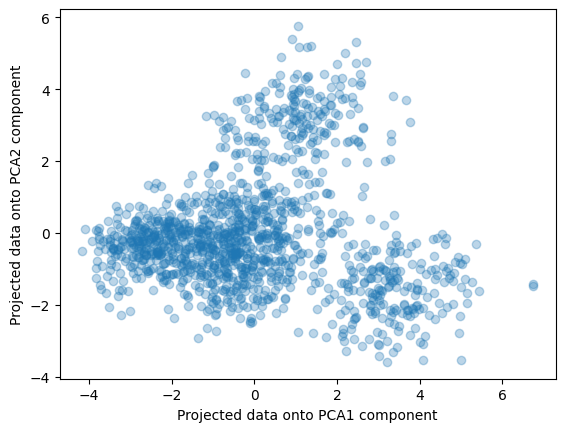

In [20]:
#Plot data projected onto PCA1 and PCA2

XX = x.dot(pca.components_[0])
YY = x.dot(pca.components_[1])

plt.xlabel('Projected data onto PCA1 component')
plt.ylabel('Projected data onto PCA2 component')

plt.scatter(XX, YY, alpha=.3)


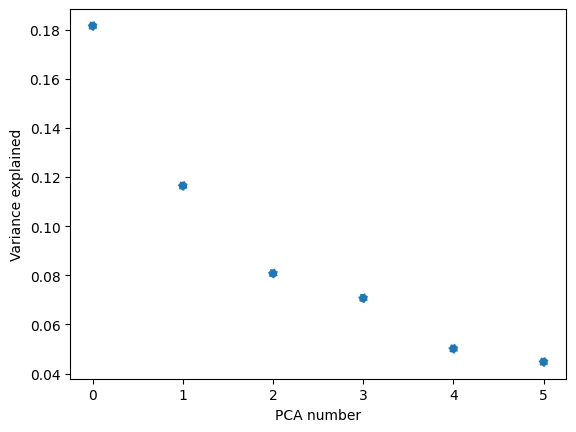

In [21]:
#PCA loadings

pca6 = PCA(n_components=6)

principalComponents = pca6.fit_transform(df_scaled)

loadings = pd.DataFrame(pca6.components_.T, index=list(df.columns.values))
var_explained = pca6.explained_variance_ratio_

#Plot PCA loadings
plt.scatter([0,1,2,3,4,5], var_explained, linestyle=':')
plt.xlabel('PCA number')
plt.ylabel('Variance explained');
#plt.show()
#loadings

CLUSTERING OBSERVATIONS projected on PCA1 and PCA2

1. Map into Principal Component Space (2D, with PCA1 and PCA2)
2. Cluster data with K-means


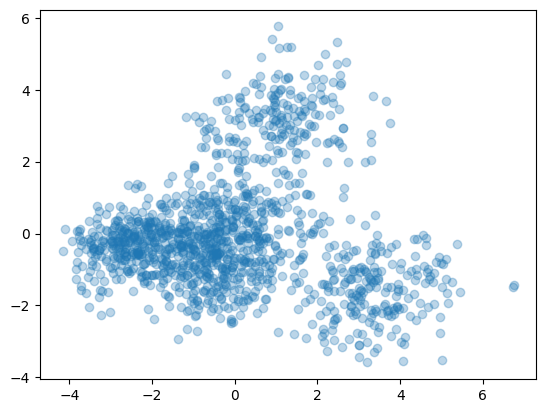

In [ ]:

# Build small dataframe with just the first two components PCA1 and PCA2

XX = x.dot(pca.components_[0])
YY = x.dot(pca.components_[1])

df_components = pd.DataFrame({'PCA1':XX, 'PCA2':YY}) #new data frame just with the first two components

plt.scatter(XX, YY, alpha=.3);

In [25]:
# CLUSTER DATA WITH K-MEANS
#Import required module
from sklearn.cluster import KMeans

#Initialize the class object
kmeans = KMeans(n_clusters= 3)

#predict the labels of clusters.
label = kmeans.fit_predict(df_components)

#predict the labels of clusters.
label = kmeans.fit_predict(df_components)

#filter rows of original data
filtered_label0 = np.array(df_components[label == 0])

#Getting unique labels

u_labels = np.unique(label)

#plotting the results:

plt.xlabel('Projected data onto first PCA component')
plt.ylabel('Projected data onto second PCA component')

for i in u_labels:
    filtered_label = np.array(df_components[label == i])
    plt.scatter(filtered_label[:,0], filtered_label[:,1], label = i)
plt.legend()
plt.show()

NameError: ignored

I would be interested to find out what each cluster means!

#Model Building
We will predict BMI based on the other attributes
We will try two models here – Linear Regression and SV Regressor to predict the BMI.


In [26]:
# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Split FIRST in TEST & TRAIN. (AVOID: X_train, X_test, y_train, y_test = train_test_split(X, y, ...))
from sklearn.model_selection import train_test_split
TRAIN,TEST = train_test_split(df, test_size=1/4)

# shape of train and test splits
TRAIN.shape, TEST.shape


((975, 24), (326, 24))

In [27]:
#Normalize TRAIN and then apply same transformation to TEST separately

##TRAIN##
# create an object of the StandardScaler
scaler = StandardScaler()

# fit with Scaler
TRAINs = TRAIN.copy()
TRAIN_cols = list(TRAIN.columns.values)
features = TRAIN[TRAIN_cols]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

TRAINs[TRAIN_cols] = features  #Puts together the matrix and the names of columns



In [28]:
TRAINs

,hs_trafnear_h_pow1over3,hs_mecpp_cadj_Log2,hs_mep_cadj_Log2,hs_pfna_c_Log2,hs_pfhxs_c_Log2,hs_pbde47_cadj_Log2,hs_pbde47_madj_Log2,hs_dep_cadj_Log2,hs_detp_madj_Log2,hs_hcb_cadj_Log2,...,h_temperature_preg_None,hs_cd_m_Log2,hs_cu_c_Log2,h_PM_Log,h_NO2_Log,h_accesslines300_preg_dic0,h_accesspoints300_preg_Log,hs_pm25abs_wk_hs_h_Log,h_abs_ratio_preg_Log,hs_zbmi_who
511,-0.497678,2.222644,0.231581,0.280163,-0.350391,0.251462,-0.725082,0.712707,0.748468,-0.736079,...,1.362719,0.471850,0.682704,-0.039083,-1.320586,-0.508001,-0.359522,-0.691236,0.469436,1.066685
311,-0.643656,0.519025,1.049642,-0.903503,0.129567,0.002563,-1.197463,-2.679894,0.979912,-1.023211,...,-0.439731,-0.360769,0.272417,-0.458792,1.609740,-0.508001,0.270855,-0.741871,-0.734498,0.652702
114,1.555679,0.914205,-0.047532,-0.984116,-3.007463,0.117047,-0.428241,-0.572063,0.587576,-0.079496,...,0.041552,-0.463110,0.593786,-0.298768,0.208911,-0.508001,-1.715115,-0.691236,1.298661,0.458384
267,-0.934055,-1.221887,-1.240928,-0.103366,0.553420,0.325124,3.344272,0.164814,0.634377,-0.139727,...,-1.185065,-2.337117,-0.996201,-0.551504,-1.230602,-0.508001,-0.359522,-1.766244,-0.503392,0.602011
1071,-1.157283,-0.374253,0.960106,-2.306845,-0.267227,-2.730393,0.382964,0.925598,-1.028852,-0.911723,...,-0.769591,1.363891,-1.145706,0.564351,0.538941,1.968502,0.996226,0.931103,1.537497,0.939956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,1.018811,1.226936,1.124220,-0.506374,-1.017584,-0.017966,0.138181,0.492855,-1.222217,2.027108,...,-0.769591,-0.904359,0.418714,-1.013756,-0.148022,-0.508001,-0.169297,0.518250,1.323697,0.534421
68,-0.934055,0.116017,1.043230,0.609158,0.345947,0.191434,-0.427584,0.787021,0.526341,-0.095011,...,-0.483311,0.194578,0.580981,-0.767256,0.510543,-0.508001,-0.359522,-2.195031,-2.122145,-0.572349
535,-0.934055,0.254703,1.030217,-0.430366,0.492103,0.003457,-0.489851,-1.544664,-1.317877,-0.491843,...,-0.402720,-0.463110,0.580981,-0.447370,-0.775704,-0.508001,-0.859858,-1.309014,-0.439346,0.838572
250,-0.934055,0.334387,-1.080470,1.072313,0.345947,0.510847,-0.205776,0.447263,1.431394,0.112654,...,-0.431434,1.484942,0.398961,-0.623366,-0.944906,-0.508001,-0.359522,0.619046,-0.903361,-0.563901


In [ ]:
#Apply scaler to test

# fit with Scaler
TESTs = TEST.copy()
TEST_cols = list(TEST.columns.values)
features_test = TEST[TEST_cols]

# FIT TO TRAIN. --NO RE-FITTING MODEL !
features_test = scaler.transform(features_test.values)

TESTs[TEST_cols] = features_test  #Puts together the matrix and the names of columns

TESTs.shape
#


(326, 24)

In [29]:
#Verify scaling

print('Mean TRAIN')
print(TRAINs.mean())

print('Variance TRAIN')
print(TRAINs.var())


print('')
print('Mean TEST')
print(TESTs.mean())

print('Variance TEST')
print(TESTs.var())



Mean TRAIN
hs_trafnear_h_pow1over3       1.184238e-16
hs_mecpp_cadj_Log2            1.366428e-17
hs_mep_cadj_Log2              3.024361e-16
hs_pfna_c_Log2                8.745141e-17
hs_pfhxs_c_Log2               1.020266e-16
hs_pbde47_cadj_Log2           1.703481e-16
hs_pbde47_madj_Log2          -3.643809e-17
hs_dep_cadj_Log2             -1.002047e-17
hs_detp_madj_Log2             3.643809e-18
hs_hcb_cadj_Log2              1.639714e-16
hs_pcb180_cadj_Log2          -2.915047e-17
h_lden_cat_preg_None         -2.769295e-16
hs_ndvi100_h_None            -9.656094e-17
h_ndvi100_preg_None           3.862437e-16
h_temperature_preg_None       1.730809e-16
hs_cd_m_Log2                  3.780452e-16
hs_cu_c_Log2                  1.650645e-15
h_PM_Log                      1.785466e-16
h_NO2_Log                    -1.967657e-16
h_accesslines300_preg_dic0    9.291713e-17
h_accesspoints300_preg_Log   -3.079019e-16
hs_pm25abs_wk_hs_h_Log        1.821904e-17
h_abs_ratio_preg_Log          5.101332e-17


NameError: ignored

##Linear Regression##

In [ ]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Separate de independent variable in TRAIN AND TEST

x_train = TRAINs.drop(columns=[target])
y_train = TRAINs[target]

x_test = TESTs.drop(columns=[target])
y_test = TESTs[target]

# create an object of the LinearRegression Model
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(x_train, y_train)

# predict the target on train and test data
predict_train = model_LR.predict(x_train)
predict_test  = model_LR.predict(x_test)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**(0.5))


# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, predict_train))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination r2: %.2f'
      % r2_score(y_test, predict_test))

RMSE on train data:  0.9152808517366083
RMSE on test data:  0.9371738710904567
Mean squared error: 0.84
Coefficient of determination r2: 0.05


NameError: ignored

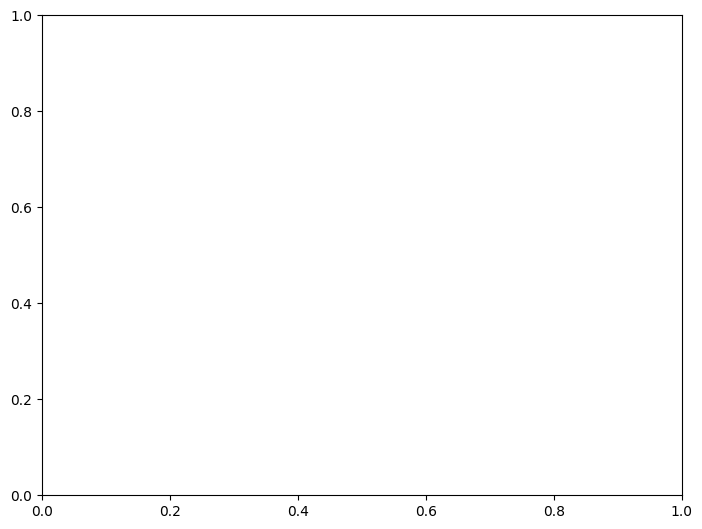

In [30]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(y_test,predict_test, color='r')
ax.set_xlabel('y_test')
ax.set_ylabel('predict_test')
ax.set_title('Real BMI vs Predicted BMI with Linear Regression')

plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.show()


Assume R2 = 0.10
It can be referred that 10% of the variability of the dependent output attribute can be explained by the model while the remaining 91 % of the variability is still unaccounted for.

R2 indicates the proportion of the outcome explained by the model. A higher value of R2 is desirable as it indicates better results

0% represents a model that does not explain any of the variation in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
100% represents a model that explains all the variation in the response variable around its mean.

The coefficient of determination can be negative (CoD). ... This negative value indicates that the data are not explained by the model. In other words, the mean of the data is a better model than the regression. If CoD is used as an accuracy measure, then the data should not be the regression data

In [ ]:
#Repeat the analysis with the highly correlated variables
TRAIN_reduced = TRAINs[variable_corr]
TRAIN_reduced.shape

TEST_reduced = TESTs[variable_corr]
TEST_reduced.shape

#Separate de independent variable in TRAIN AND TEST

x_train = TRAIN_reduced.drop(columns=[target])
y_train = TRAIN_reduced[target]

x_test = TEST_reduced.drop(columns=[target])
y_test = TEST_reduced[target]

# create an object of the LinearRegression Model
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(x_train, y_train)

# predict the target on train and test data
predict_train = model_LR.predict(x_train)
predict_test  = model_LR.predict(x_test)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**(0.5))


# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, predict_train))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination r2: %.2f'
      % r2_score(y_test, predict_test))


RMSE on train data:  0.9617204558376772
RMSE on test data:  0.9706107395853467
Mean squared error: 0.92
Coefficient of determination r2: -0.02


Simpler model not always makes it better!

#Support Vector Regression#
Three types of kernels. THIS FIELD IS VERY SLOW DUE TO SVM!

In [31]:
from sklearn.svm import SVR

#Separate the independent variable in TRAIN AND TEST

x_train = TRAINs.drop(columns=[target])
y_train = TRAINs[target]

x_test = TESTs.drop(columns=[target])
y_test = TESTs[target]

#Define models

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)  #Radial Basis Function
svr_lin = SVR(kernel='linear', C=1e3)  #Linear relationship
svr_poly = SVR(kernel='poly', C=1e3, degree=2) #Quadratic relationship (polynomial of second degree)

#Train models
y_rbf = svr_rbf.fit(x_train, y_train).predict(x_test)
#y_lin = svr_lin.fit(x_train, y_train).predict(x_test)
#y_poly = svr_poly.fit(x_train, y_train).predict(x_test)

#Predict
print('Coefficients of determination r2: ')
print(' RBF kernel r2: %s' %(r2_score(y_test, y_rbf)))
#print(' Lineal kernel r2: %s' %(r2_score(y_test, y_lin)))
#print(' Polynomial kernel r2: %s' %(r2_score(y_test, y_poly)))



NameError: ignored

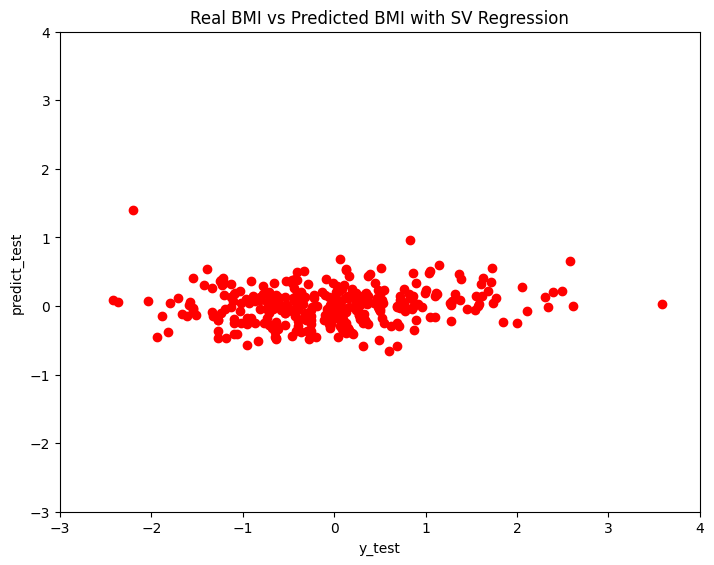

In [ ]:
#Plot results with SVM
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(y_test,predict_test, color='r')
ax.set_xlabel('y_test')
ax.set_ylabel('predict_test')
ax.set_title('Real BMI vs Predicted BMI with SV Regression')

plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.show()

#Classification#

We need a categorical outcome: HIGH BMI / LOW BMI

First, separate the data in two classes according to a BMI threshold.

Resources [Histogram](https://towardsdatascience.com/take-your-histograms-to-the-next-level-using-matplotlib-5f093ad7b9d3)

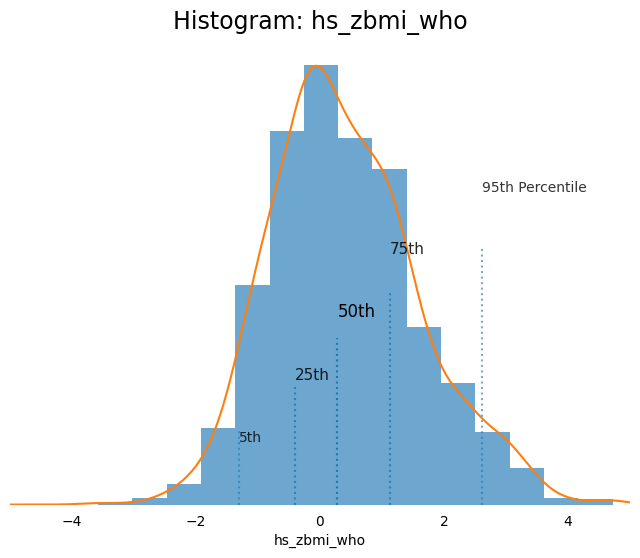

In [32]:
#Plot histogram of target to select 95% threshold

df_ = df[target]  #select only the target variable to plot
fig, ax = plt.subplots(figsize = (8,6))

# Plot
    # Plot histogram
df_.plot(kind = "hist", density = True, alpha = 0.65, bins = 15) # change density to true, because KDE uses density
    # Plot KDE
df_.plot(kind = "kde")

    # Quantile lines
quant_5, quant_25, quant_50, quant_75, quant_95 = df_.quantile(0.05), df_.quantile(0.25), df_.quantile(0.5), df_.quantile(0.75), df_.quantile(0.95)
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")


# X
ax.set_xlabel(target)
ax.set_xlim(-5, 5)
# Y

ax.set_yticklabels([])
ax.set_ylabel("")

# Annotations
ax.text(quant_5, 0.05, "5th", size = 10, alpha = 0.8);
ax.text(quant_25, 0.10, "25th", size = 11, alpha = 0.85);
ax.text(quant_50, 0.15, "50th", size = 12, alpha = 1);
ax.text(quant_75, 0.20, "75th", size = 11, alpha = 0.85);
ax.text(quant_95, 0.25, "95th Percentile", size = 10, alpha =.8);

# Overall
ax.grid(False)
ax.set_title("Histogram: %s" %(target), size = 17, pad = 10)

    # Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

plt.show()


Kernel-Density-Estimation (KDE). KDE tries to compute the underlying distribution of a variable, which will draw a very smooth line around the histogram.

HIGH BMI: Higher than 50% quantile (The Median)
Low BMI: Lower than 50% quantile (The Median)


##Comparison between several ML classifiers##

In [33]:
# Classification

import sklearn


#target

threshold = df_.quantile(0.5)

X = df.drop(columns=target, axis=1) #predictors without the outcome
y = df[target]     #continuous outcome

#Binarize outcome
y2 = sklearn.preprocessing.binarize(y.values.reshape(-1, 1), threshold=threshold, copy=True)

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=7)




In [34]:
y2

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


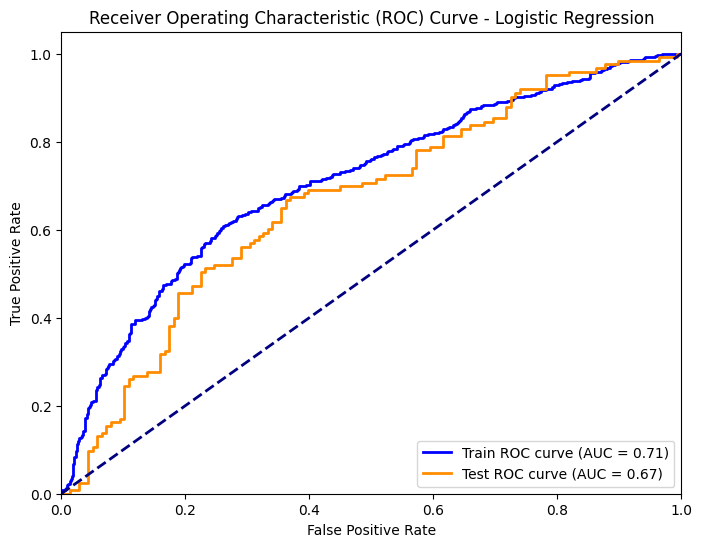

<ipython-input-35-aee3619fc953>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


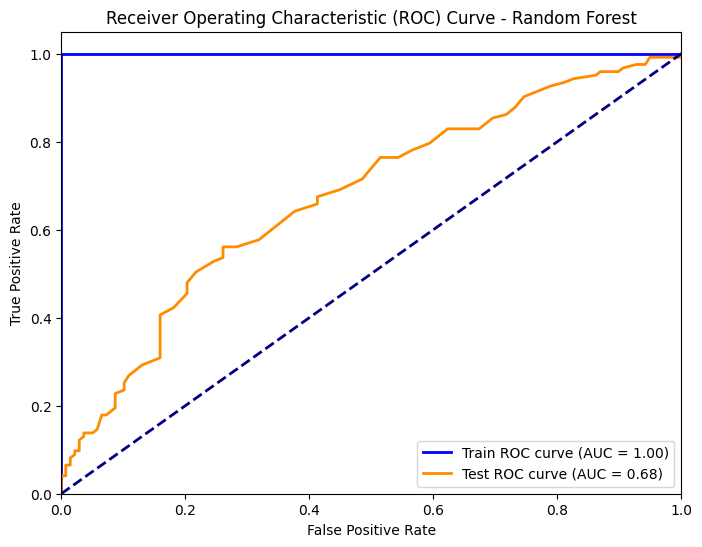

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


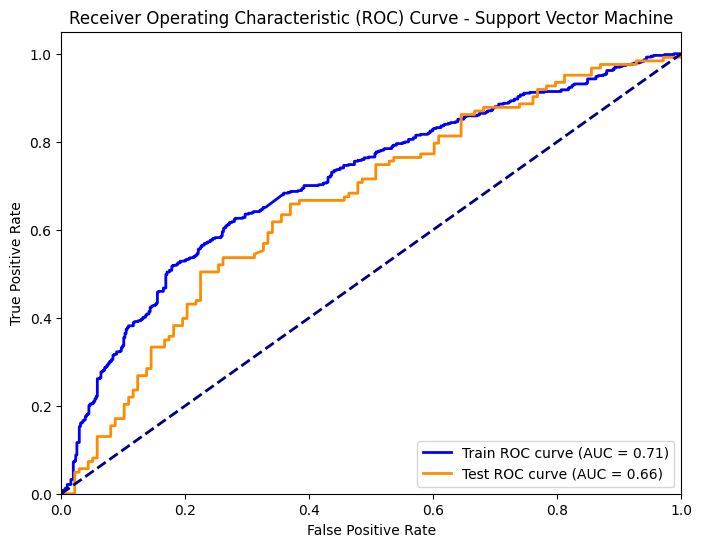

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


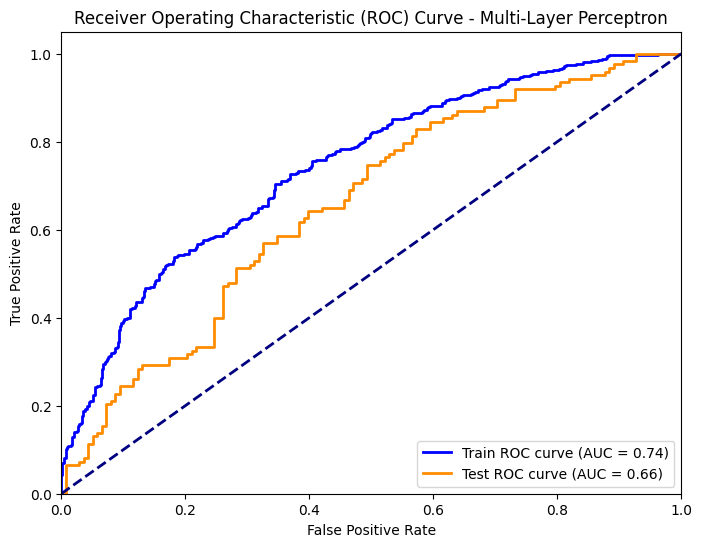

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


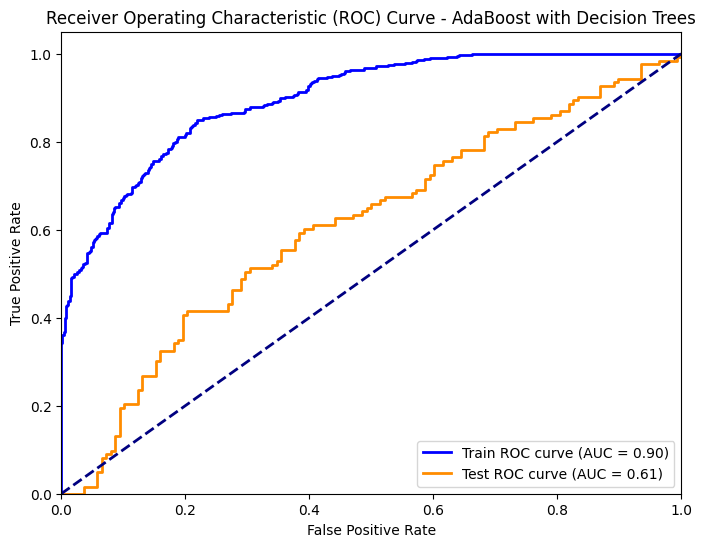

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


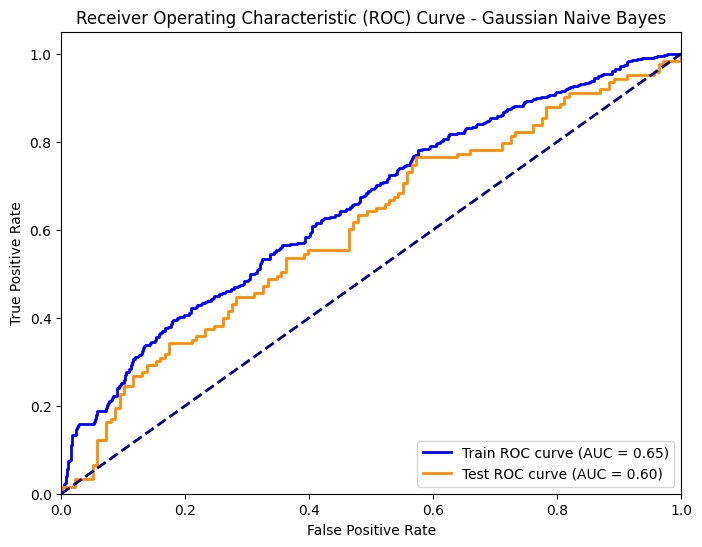

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc


# Define a list of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=10000, random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVC(kernel='linear', probability=True, random_state=42)),
    ('Multi-Layer Perceptron', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)),
    ('AdaBoost with Decision Trees', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('Gaussian Naive Bayes', GaussianNB())
]

# Iterate through classifiers and evaluate them
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)

    if hasattr(classifier, "predict_proba"):
        # Use predict_proba for models that support it
        y_train_scores = classifier.predict_proba(X_train)[:, 1]
        y_test_scores = classifier.predict_proba(X_test)[:, 1]
    else:
        # For SVM, use decision_function
        y_train_scores = classifier.decision_function(X_train)
        y_test_scores = classifier.decision_function(X_test)

    # Calculate ROC curve values for both sets
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_scores)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_scores)

    # Calculate the AUC (Area Under the ROC Curve) for both sets
    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Plot and display ROC curves
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (AUC = %0.2f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
    plt.legend(loc='lower right')
    plt.show()

##Feature importance##
Sourced from [Link](https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d)

Best resource: [Link](https://machinelearningmastery.com/calculate-feature-importance-with-python/)

#Explainable AI & SHAP

[Using SHAP Values to explain how your Machine Learning Model Works](https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137)


Following models are supported by Tree SHAP at present: XGBoost, LightGBM, CatBoost, Pyspark & most tree-based models in scikit-learn

**Global interpretability**: SHAP values not only show feature importance but also show whether the feature has a positive or negative impact on predictions.

**Local interpretability:** We can calculate SHAP values for each individual prediction and know how the features contribute to that single prediction.


**Directionality impact**

With the same summary_plot method, we can plot dot charts to visualize the directionality impact of the features.

In [36]:
#!pip install -q shap # Run this if you do not have shap installed
import shap
from sklearn.tree import DecisionTreeClassifier

# Train a DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

# Create a SHAP explainer with the trained decision tree model
explainer = shap.Explainer(decision_tree_classifier, X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values[1],features = X_train.columns,plot_type = "bar",color = "red")

ModuleNotFoundError: ignored

# THANK YOU FOR YOUR PARTICIPATION !!

# BEST LUCK WITH YOUR DATA SCIENCE PROJECTS!

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

# Display GIF in Jupyter, CoLab, IPython
with open('puppy-dog.gif','rb') as f:
    display.Image(data=f.read(), format='png')